## Average kmer frequency and Saliency Map per Clade

In [14]:
from pathlib import Path
import numpy as np
import pandas as pd
import matplotlib.pyplot  as plt
from supervised_dna.utils import fcgrpos2kmers, array2img
from supervised_dna.saliency_maps import get_kmer_importance

In [31]:
k = 8
CLADES = ['S','L','G','V','GR','GH','GV','GK']
clade = CLADES[5]
list_saliencymaps = list(Path(f"saliency-maps/hCoV-19/{clade}").rglob("*.npy"))
list_freqkmer = list(Path(f"freq-kmer/hCoV-19/{clade}").rglob("*.npy"))

In [32]:
clade, len(list_saliencymaps), len(list_freqkmer)

('GH', 6, 6)

In [33]:
def plot(array_freq, grad_eval):
    "FCGR vs Saliency Maps"
    fig, axes = plt.subplots(1,2,figsize=(14,5))
    axes[0].imshow(array2img(array_freq), cmap="gray")
    i = axes[1].imshow(grad_eval,cmap="jet",alpha=0.8)
    fig.colorbar(i)
    return fig

### saliency maps

In [34]:
sm_clade = np.zeros((2**k,2**k)) # saliency map
for path_saliencymap in list_saliencymaps: 
    sm = np.load(path_saliencymap)
    sm_clade = np.add(sm_clade, sm)
avg_sm = sm_clade / len(list_saliencymaps)

### freq kmers

In [35]:
freq_clade = np.zeros((2**k,2**k)) # freq kmers
for path_freqkmer in list_freqkmer: 
    freq = np.load(path_freqkmer)
    freq_clade = np.add(freq_clade, freq)
avg_freq = freq_clade / len(list_freqkmer)

### Average FCGR and Saliency Map

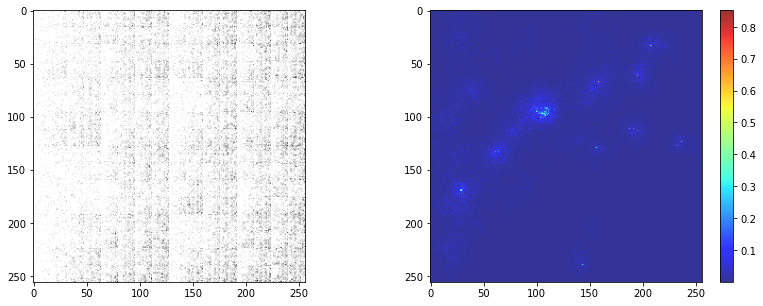

In [36]:
fig = plot(avg_freq, avg_sm)

In [37]:
# k-mer importance  
pos2kmer = fcgrpos2kmers(k=k)
kmer_importance = get_kmer_importance(avg_sm, 
                    threshold=0.2, 
                    array_freq=avg_freq, 
                    pos2kmer=pos2kmer
                    )

pd.DataFrame(kmer_importance)

,kmer,row,col,grad,freq
0,TCATAGCG,169,29,0.852833,1.000000
1,GTAAACGA,67,158,0.766111,0.000000
2,CCAACTTC,96,108,0.763907,0.000000
3,CGAACTTC,98,108,0.751797,0.000000
4,GGAACTTC,99,108,0.565984,0.166667
5,TCCACTTC,97,105,0.452624,0.000000
6,TAAACGAA,33,207,0.447552,6.333333
7,TACACTTC,97,107,0.400001,2.000000
8,GGTGGATC,95,100,0.389446,0.000000
9,GCAAACCT,129,156,0.369656,1.000000
